In [1]:
from igraph import *

In [2]:
g = Graph()

In [3]:
g

In [4]:
g.add_vertices(3)

In [5]:
print(g)

IGRAPH U--- 3 0 --


In [6]:
g.add_edges([(0,1), (1,2)])

In [7]:
print(g)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [8]:
g.add_edges([(2, 0)])
g.add_vertices(3)
g.add_edges([(2, 3), (3, 4), (4, 5), (5, 3)])
print(g)

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


In [9]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]

In [10]:
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]

In [11]:
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]

In [12]:
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [13]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x10d0f4400>, 0, {'is_formal': False})

In [14]:
g.degree()

[2, 2, 3, 3, 2, 2]

In [15]:
g

In [16]:
print(g)

IGRAPH UN-- 6 7 --
+ attr: age (v), gender (v), name (v), is_formal (e)
+ edges (vertex names):
Alice--Bob, Bob--Claire, Alice--Claire, Claire--Dennis, Dennis--Esther,
Esther--Frank, Dennis--Frank


In [17]:
charGraph = Graph(directed=True)
plotGraph = Graph()

In [18]:
charGraph.vs["Name"] = [""] # Character Name
charGraph.vs["Gender"] = [""] #Character Gender
charGraph.vs["Type"] = [""] # Character Type, hero, villian, etc.

In [19]:
char2vertex = {}
plot2vertex = {}

In [20]:
def createCharacterVertex(attributes, relations):
    charGraph.add_vertices(1)
    currVert = charGraph.vs[-1]
    for key, val in attributes.items():
        if key == "Name":
            char2vertex[val] = currVert
        currVert[key] = val
    
    for to, relation in relations.items():
        relVertex = char2vertex.get(to, None)
        if relVertex:
            relIndex = relVertex.index
            charGraph.add_edges([(currVert.index, relIndex)])
            relId = charGraph.get_eid(currVert.index, relIndex)
            charGraph.es[relId]["Relation"] = relation
    print(currVert)

In [21]:
createCharacterVertex({"Name": "Luke Skywalker", "Gender":"M", "Type":"Main Hero"}, {})

igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 0, {'Name': 'Luke Skywalker', 'Gender': 'M', 'Type': 'Main Hero'})


In [22]:
charGraph.vs[-1].index

0

In [23]:
char2vertex

{'Luke Skywalker': igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 0, {'Name': 'Luke Skywalker', 'Gender': 'M', 'Type': 'Main Hero'})}

In [24]:
createCharacterVertex({"Name": "Darth Vader", "Gender":"M", "Type":"Main Villian"}, {"Luke Skywalker": "Son"})

igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 1, {'Name': 'Darth Vader', 'Gender': 'M', 'Type': 'Main Villian'})


In [25]:
createCharacterVertex({"Name": "Han Solo", "Gender":"M", "Type":"Hero"}, {"Luke Skywalker": "Ally"})
createCharacterVertex({"Name": "Princess Leia", "Gender":"F", "Type":"Hero"}, {"Luke Skywalker": "Ally"})
createCharacterVertex({"Name": "The Emperor", "Gender":"M", "Type":"Villian"}, {"Darth Vader": "Ally"})
createCharacterVertex({"Name": "Chewbacca", "Gender":"M", "Type":"Hero"}, {"Han Solo": "Ally"})

igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 2, {'Name': 'Han Solo', 'Gender': 'M', 'Type': 'Hero'})
igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 3, {'Name': 'Princess Leia', 'Gender': 'F', 'Type': 'Hero'})
igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 4, {'Name': 'The Emperor', 'Gender': 'M', 'Type': 'Villian'})
igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 5, {'Name': 'Chewbacca', 'Gender': 'M', 'Type': 'Hero'})


In [26]:
char2vertex

{'Luke Skywalker': igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 0, {'Name': 'Luke Skywalker', 'Gender': 'M', 'Type': 'Main Hero'}),
 'Darth Vader': igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 1, {'Name': 'Darth Vader', 'Gender': 'M', 'Type': 'Main Villian'}),
 'Han Solo': igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 2, {'Name': 'Han Solo', 'Gender': 'M', 'Type': 'Hero'}),
 'Princess Leia': igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 3, {'Name': 'Princess Leia', 'Gender': 'F', 'Type': 'Hero'}),
 'The Emperor': igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 4, {'Name': 'The Emperor', 'Gender': 'M', 'Type': 'Villian'}),
 'Chewbacca': igraph.Vertex(<igraph.Graph object at 0x10d0f44f0>, 5, {'Name': 'Chewbacca', 'Gender': 'M', 'Type': 'Hero'})}

In [27]:
layout = charGraph.layout("kk")

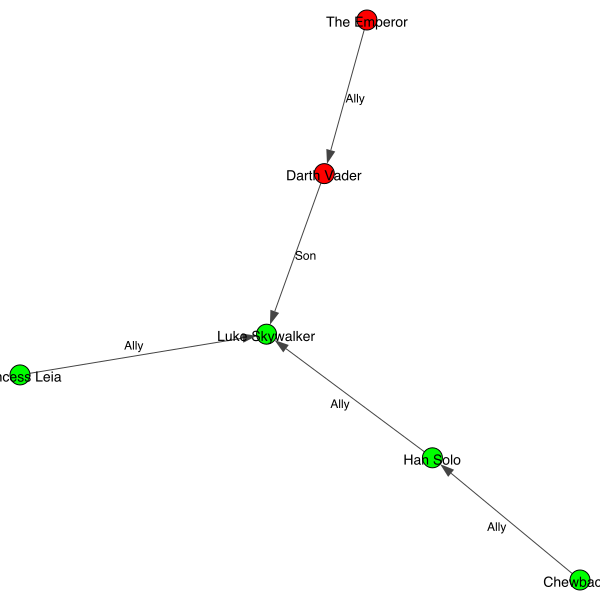

In [28]:
charGraph.vs["label"] = charGraph.vs["Name"]
charGraph.es["label"] = charGraph.es["Relation"]
color_dict = {"Hero": "green", "Villian": "red", "Main Hero":"green", "Main Villian":"red"}
charGraph.vs["color"] = [color_dict[charType] for charType in charGraph.vs["Type"]]
plot(charGraph, layout = layout)

In [46]:
#Introduction - Sets the scene for the story, ex: "A long time ago in a galay far far away...", intro characters as well
intro = {
    "Place": None,
    "Time": None,
}

#Absentation - Something goes missing, motivates hero to do something Ex: "Leia's message in R2D2 motivates Luke to find Ben Kenobi, princess is missing"
absent = {
    "Motivation": None, # Why does hero want to achieve goal
    "Goal":None # what is the goal
}

#Interdiction - Someone warns the hero about the danger of what they are going to do "Uncle Owen tells Luke not to get involved with Ben and the Jedi and to just stay on the farm"
interdic = {
    "Warning":None, #What is the advice
    "Danger":None, #What is the danger/risk
    "Giver":None #Who gave the advice
}

#Violation - The hero decides to go against the warning and pursue their goal anyway "Luke goes to find Ben Kenobi anyway"
# POTENTIAL USER INPUT
violation = {
    "HeroAction" : None, #What does the hero do to violate the advice
}

#Recon - The villian starts to learn about the hero " Darth Vader interrogates Leia and is learning more about the rebels"
recon = {
    "KnowledgeAboutHeroAcquired": None, #What has the villian learned about the hero
}

#Villany or Lack - Two things can happen, if villany is True, then the villian does something horrible, "The Death Star blows up Alderaan" or if lack is true, something is missing from the hero "Luke doesn't know the Jedi way"
villorlack = {
    "villiany": False, # True if villian does something
    "lack": False, # True if hero is missing something
    "villianAction":None, # What did the villian do
    "objectLacked":None # What is the hero missing
}

#Mediation - Hero is preparing for the upcoming fight with the villian - "Luke trains as a Jedi and the rebels prepare to attack the Death Star"
# POTENTIAL USER INPUT
mediation = {
    "heroPreperation":None, # What is the hero doing to prepare, maybe compensate for lack
}

#Punishment - The heroes fight the villians and prevail. They decide what the punishment is for the villian, "Rebels decide to destory the Death Star and cripple the Empire"
# POTENTIAL USER INPUT
punishment = {
    "villianPunishment":None, # How do the heroes punish the villian
}

#Wedding - Doesn't have to be a wedding, but the heroes get something positive, "Luke and Han are celebrated by the Rebels on Yavin 4 and the rebels are happy" 
# POTENTIAL USER INPUT
wedding = {
    "heroReward":None, # What does the hero get
}

In [44]:
[x for x in villorlack.values() if x is not None]

[False, False]

In [35]:
from enum import IntEnum

In [47]:
class ProppStoryStage(Enum):
    INTRO = 1
    ABSEN = 2
    INTER = 3
    VIOLA = 4
    RECON = 5
    VILLL = 6
    MEDIA = 7
    PUNIS = 8
    WEDDD = 9

    def advance(self):
        if self.value < 8:
            return ProppStoryStage(self.value + 1)

In [41]:
class ProppStory():
    class ProppStoryStage(Enum):
        INTRO = 1
        ABSEN = 2
        INTER = 3
        VIOLA = 4
        RECON = 5
        VILLL = 6
        MEDIA = 7
        PUNIS = 8
        WEDDD = 9
        
        def advance(self):
            if self.value < 8:
                return ProppStoryStage(self.value + 1)

    def __init__(self):
        self.currStage = ProppStoryStage.INTRO
        self.fields = self.getFields(self.currStage)
    
    def advanceStory(self):
        self.currStage = self.currStage.advance()
        self.fields = self.getFields(self.currStage)
        
    def getFields(self, ProppStage):
        if ProppStage is ProppStoryStage.INTRO:
            newFields = {"Place": None, "Time": None,}
        elif ProppStage is ProppStoryStage.ABSEN:
            newFields = {
                "Motivation": None, # Why does hero want to achieve goal
                "Goal":None # what is the goal
            }
        return newFields

In [55]:
len(ProppStoryStage)

9

In [48]:
ProppStory()

In [49]:
story = ProppStory()

In [50]:
story.currStage

<ProppStoryStage.INTRO: 1>

In [54]:
story.advanceStory()

UnboundLocalError: local variable 'newFields' referenced before assignment

In [52]:
story.currStage is ProppStoryStage.ABSEN

True

In [53]:
story.fields

{'Motivation': None, 'Goal': None}